## Observations and Insights 

In [100]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = mouse_metadata.merge(study_results, how='left', on='Mouse ID', sort=False)

# Display the data table for preview

mouse_df






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice.
mice_count = mouse_df['Mouse ID'].count()
mice_count


1893

In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_df[mouse_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
duplicate_mouse




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [103]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df.drop_duplicates(keep=False,inplace=True)

new = mouse_df.reset_index().set_index('Mouse ID')
clean_mouse = new.drop(['g989']).reset_index()
clean_mouse




,Mouse ID,index,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,0,45.000000,0
1,k403,1,Ramicane,Male,21,16,5,38.825898,0
2,k403,2,Ramicane,Male,21,16,10,35.014271,1
3,k403,3,Ramicane,Male,21,16,15,34.223992,1
4,k403,4,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,z969,1888,Naftisol,Male,9,30,25,63.145652,2
1876,z969,1889,Naftisol,Male,9,30,30,65.841013,3
1877,z969,1890,Naftisol,Male,9,30,35,69.176246,4
1878,z969,1891,Naftisol,Male,9,30,40,70.314904,4


In [104]:
# Checking the number of mice in the clean DataFrame.
clean_mouse['Mouse ID'].nunique()


248

## Summary Statistics

In [105]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_group = clean_mouse.groupby(['Drug Regimen'])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = regimen_group['Tumor Volume (mm3)'].mean()
regimen_med = regimen_group['Tumor Volume (mm3)'].median()
regimen_var = regimen_group['Tumor Volume (mm3)'].var()
regimen_SD = regimen_group['Tumor Volume (mm3)'].std()
regimen_SEM = regimen_group['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

summary_statistics = pd.DataFrame({"Mean": regimen_mean, "Median": regimen_med, "Variance": regimen_var, 
                                  "Standard Deviation": regimen_SD, "SEM": regimen_SEM})
summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group_agg = clean_mouse.groupby('Drug Regimen')
# Using the aggregation method, produce the same summary statistics in a single line
regimen_group_agg['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


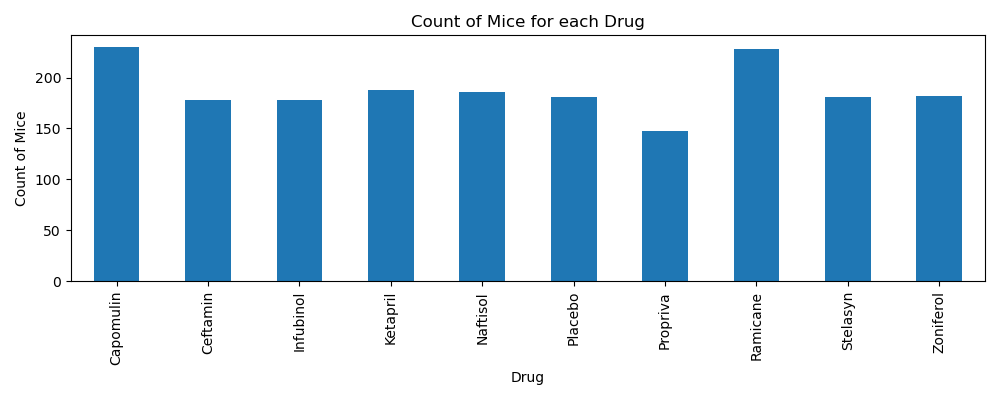

In [107]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_data = clean_mouse.groupby(['Drug Regimen']).count()['Mouse ID']
drug_data.plot(kind='bar', figsize = (10,4))
plt.title("Count of Mice for each Drug")
plt.xlabel("Drug")
plt.ylabel('Count of Mice')
plt.tight_layout()


<IPython.core.display.Javascript object>


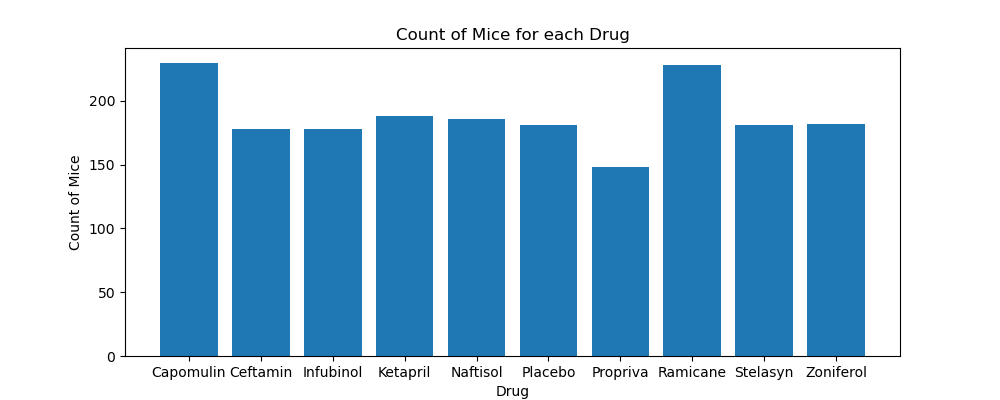

Text(0, 0.5, 'Count of Mice')

In [108]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = summary_statistics.index.to_list()
drug_data_list = drug_data.to_list()
plt.figure(figsize=(10,4))
plt.bar(drugs, drug_data_list)
plt.title("Count of Mice for each Drug")
plt.xlabel("Drug")
plt.ylabel('Count of Mice')


<IPython.core.display.Javascript object>


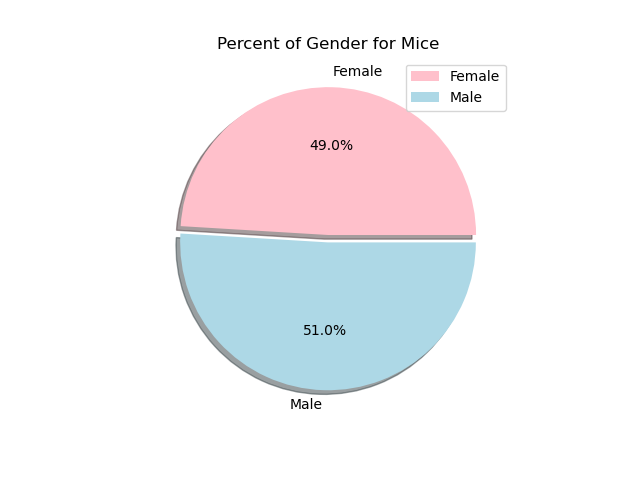

Text(0, 0.5, '')

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = pd.DataFrame(clean_mouse.groupby(['Sex']).count()).reset_index()
gender_data = gender_data[["Sex","Mouse ID"]]
colors = ["pink", "lightblue"]
explode = (0.05, 0)
gender_data.plot(kind="pie", y = "Mouse ID", autopct='%1.1f%%',
              shadow=True, labels=gender_data["Sex"], legend = True, colors = colors, explode = explode)
plt.title("Percent of Gender for Mice")
plt.ylabel("")





<IPython.core.display.Javascript object>


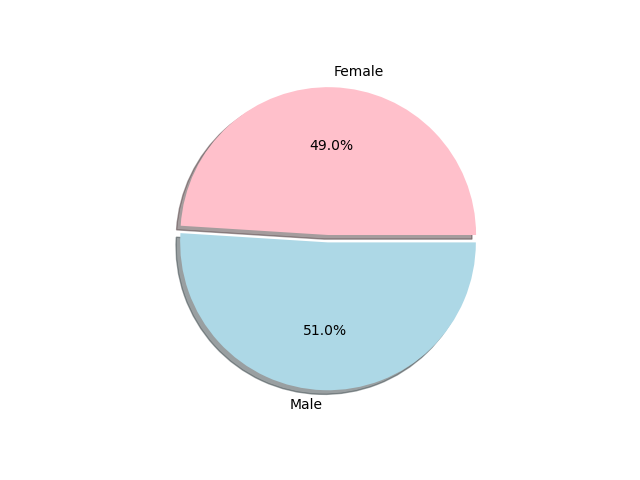

In [110]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["pink", "lightblue"]
slices = [49.0, 51.0]
explode = (0.05,0)
plt.pie(slices, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True)
plt.show()


## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Start by getting the last (greatest) timepoint for each mouse
last_time_df = pd.DataFrame(clean_mouse.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})
last_time_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_df = pd.merge(clean_mouse, last_time_df, on='Mouse ID')
final_df = final_df.drop(columns=['index'])
last_tumor = final_df.loc[final_df['Timepoint'] == final_df['Last Timepoint']]
filtered_df = last_tumor[last_tumor['Drug Regimen'].isin(drug_list)]
filtered_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45
19,s185,Capomulin,Female,3,17,45,23.343598,1,45
29,x401,Capomulin,Female,16,15,45,28.484033,0,45
39,m601,Capomulin,Male,22,17,45,28.430964,1,45
49,g791,Ramicane,Male,11,16,45,29.128472,1,45
...,...,...,...,...,...,...,...,...,...
1784,x822,Ceftamin,Male,3,29,45,61.386660,3,45
1800,y163,Infubinol,Female,17,27,45,67.685569,3,45
1832,y769,Ceftamin,Female,6,27,45,68.594745,4,45
1842,y865,Ceftamin,Male,23,26,45,64.729837,3,45


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    temp_df = filtered_df.loc[filtered_df['Drug Regimen'] == drug]
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Last Timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    tumor_data.append(values)
    
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    # add subset 


    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    

IQR for Capomulin: 7.781863460000004
Number of Capomulin outliers: 1
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
IQR for Ramicane: 9.098536719999998
Number of Ramicane outliers: 0
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
IQR for Infubinol: 11.477135160000003
Number of Infubinol outliers: 18
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
IQR for Ceftamin: 15.577752179999997
Number of Ceftamin outliers: 0
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999


<IPython.core.display.Javascript object>


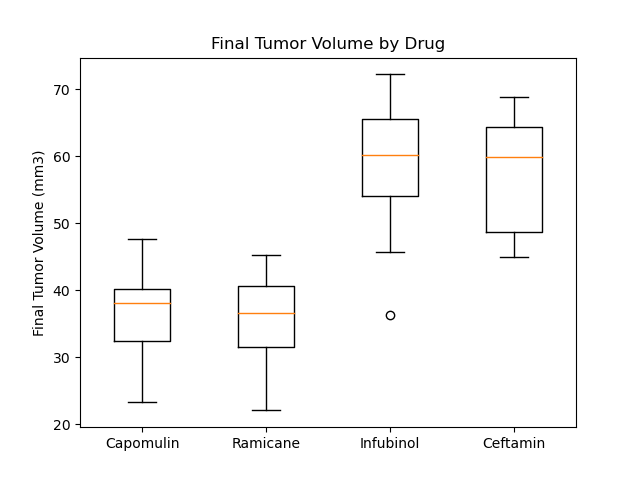

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data)
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


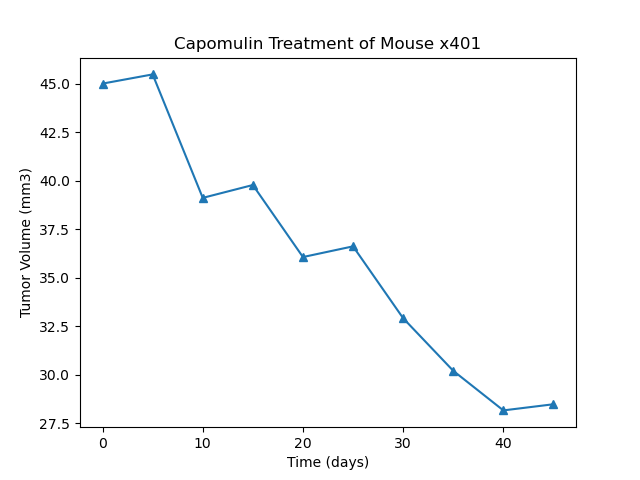

In [113]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_mouse.loc[clean_mouse['Mouse ID'] == 'x401']
plt.plot(cap_mouse['Timepoint'], cap_mouse['Tumor Volume (mm3)'], marker = '^')
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")
plt.show()

<IPython.core.display.Javascript object>


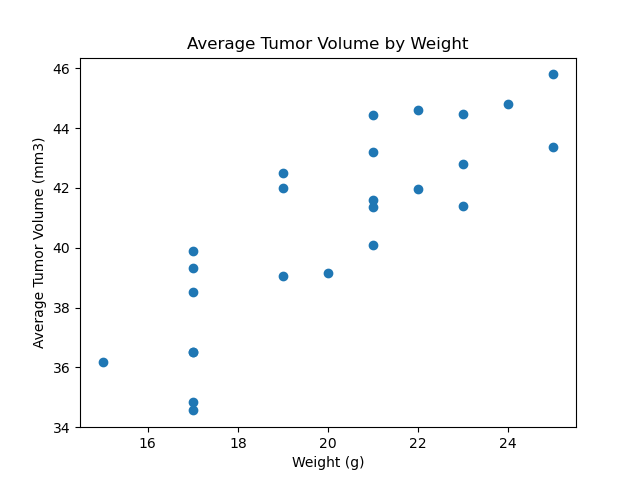

In [114]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_tumor_vol = pd.merge(capomulin_df, avg_tumor_vol, on='Mouse ID')
weight_vol = avg_tumor_vol[['avg_tumor_vol', 'Weight (g)']].drop_duplicates()
weight_vol

y = weight_vol['avg_tumor_vol']
x = weight_vol['Weight (g)']
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()


## Correlation and Regression

<IPython.core.display.Javascript object>


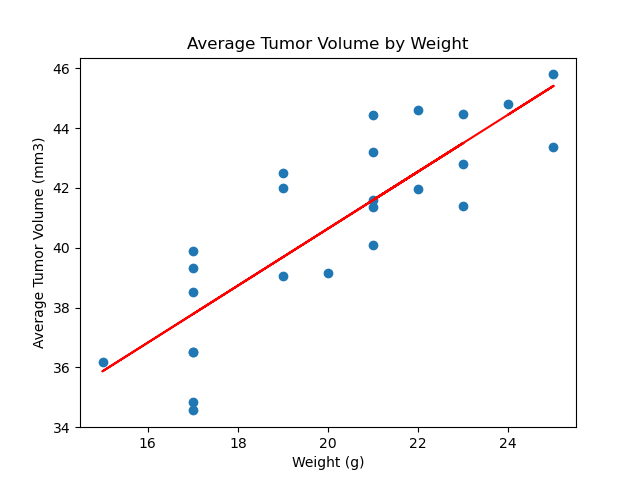

In [116]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
correlation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
